In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/Shareddrives/Image\ Processing\ Assignment/images

001.jpg  010.jpg  020.jpg  030.jpg  040.jpg  050.jpg  060.jpg
001.tif  011.jpg  021.jpg  031.jpg  041.jpg  051.jpg  nonossifying_fibroma1.jpg
002.jpg  012.jpg  022.jpg  032.jpg  042.jpg  052.jpg  nonossifying_fibroma1_modified.jpg
003.jpg  013.jpg  023.jpg  033.jpg  043.jpg  053.jpg  nonossifying_fibroma2.jpg
004.jpg  014.jpg  024.jpg  034.jpg  044.jpg  054.jpg  nonossifying_fibroma2_modified.jpg
005.jpg  015.jpg  025.jpg  035.jpg  045.jpg  055.jpg  toddlers_fracture2.jpg
006.jpg  016.jpg  026.jpg  036.jpg  046.jpg  056.jpg  toddlers_fracture.jpg
007.jpg  017.jpg  027.jpg  037.jpg  047.jpg  057.jpg
008.jpg  018.jpg  028.jpg  038.jpg  048.jpg  058.jpg
009.jpg  019.jpg  029.jpg  039.jpg  049.jpg  059.jpg


**Importing Necssary Libraries**
---



In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage import img_as_float

# **Smoothening (guassian, minimum,maximum, median)**

In [ ]:
class SmootheningImageEnhancer:
    def __init__(self, input_dir, output_dir):
        self.input_dir = input_dir
        self.output_dir = output_dir
        self.radius = 5
        self.amount = 2

        if not os.path.exists(self.output_dir):
            os.makedirs(self.output_dir)

    def process_image(self, filename):
        image_path = os.path.join(self.input_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = img_as_float(image)

        filters = {
            "Gaussian": cv2.GaussianBlur(image, (5, 5), self.radius),
            "Median": cv2.medianBlur((image * 255).astype(np.uint8), 5),
            "Maximum": cv2.dilate(image, np.ones((5, 5), np.uint8)),
            "Minimum": cv2.erode(image, np.ones((5, 5), np.uint8)),
        }

        for filter_name, filtered_image in filters.items():
            filtered_image = img_as_float(filtered_image)  # Convert back to float for comparison
            mask = image - filtered_image
            sharpened_image = image + mask * self.amount
            sharpened_image = np.clip(sharpened_image, 0, 1)

            # Create a separate subdirectory for each filter technique
            filter_dir = os.path.join(self.output_dir, filter_name)
            if not os.path.exists(filter_dir):
                os.makedirs(filter_dir)

            # Save the sharpened image in the appropriate subdirectory
            output_path = os.path.join(filter_dir, filename)
            cv2.imwrite(output_path, (sharpened_image * 255).astype(np.uint8))

    def run(self):
        for filename in os.listdir(self.input_dir):
            if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
                self.process_image(filename)

# Usage example
input_dir = '/content/drive/Shared drives/Image Processing Assignment/images'
output_dir = '/content/drive/Shared drives/Image Processing Assignment/UnsharpImages'

enhancer = SmootheningImageEnhancer(input_dir, output_dir)
enhancer.run()


# **Enhancement Techniquev(Constrast Limited Adaptive Histogram Equalization (CLAHE))**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float

class CLAHEEnhancer:
    def __init__(self, input_dir, output_dir, hist_dir, clip_limit=2.0, tile_grid_size=(8, 8)):
        self.input_dir = input_dir
        self.output_dir = output_dir
        self.hist_dir = hist_dir
        self.clip_limit = clip_limit
        self.tile_grid_size = tile_grid_size

        os.makedirs(self.output_dir, exist_ok=True)
        os.makedirs(self.hist_dir, exist_ok=True)

    def plot_combined_histogram(self, original_image, clahe_image, save_path):
        plt.figure()

        # Compute histograms
        hist_original, bins_original = np.histogram(original_image.flatten(), bins=256, range=[0, 256])
        hist_clahe, bins_clahe = np.histogram(clahe_image.flatten(), bins=256, range=[0, 256])

        # Plot original image histogram in red
        plt.plot(bins_original[:-1], hist_original, color='red', label='Original Image')

        # Plot CLAHE image histogram in blue
        plt.plot(bins_clahe[:-1], hist_clahe, color='blue', label='CLAHE Enhanced Image')

        # Add titles and labels
        plt.title('Histogram Comparison: Original vs CLAHE Enhanced')
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.xlim([0, 255])
        plt.legend()

        # Save combined histogram
        plt.savefig(save_path)
        plt.close()

    def process_image(self, filename):
        # Load image
        image_path = os.path.join(self.input_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error: Image {filename} could not be read.")
            return

        image = img_as_float(image)

        # Apply CLAHE
        clahe = cv2.createCLAHE(clipLimit=self.clip_limit, tileGridSize=self.tile_grid_size)
        clahe_image = clahe.apply((image * 255).astype(np.uint8))

        # Save the CLAHE-enhanced image
        output_path = os.path.join(self.output_dir, filename)
        cv2.imwrite(output_path, clahe_image)

        # Save combined histogram of original and CLAHE images
        self.plot_combined_histogram(image * 255, clahe_image, os.path.join(self.hist_dir, f'{filename}_combined_histogram.jpg'))

    def run(self):
        # Iterate over images in the input directory
        for filename in os.listdir(self.input_dir):
            if filename.endswith((".png", ".jpg", ".jpeg")):
                self.process_image(filename)

# Usage example
input_dir = '/content/drive/Shared drives/Image Processing Assignment/images'
output_dir = '/content/drive/Shared drives/Image Processing Assignment/CLAHEImages'
hist_dir = '/content/drive/Shared drives/Image Processing Assignment/CLAHEHistograms'

enhancer = CLAHEEnhancer(input_dir, output_dir, hist_dir, clip_limit=2.0, tile_grid_size=(8, 8))
enhancer.run()



# **Sharpening Laplacian Technique**




In [ ]:
class ImageEnhancer:

    def __init__(self, input_dir, output_dir): # Changed _init_ to __init__
        self.input_dir = input_dir
        self.output_dir = output_dir
        self.amount = 1.5  # Adjust sharpening amount as needed

        if not os.path.exists(self.output_dir):
            os.makedirs(self.output_dir)

    def process_image(self, filename):
        image_path = os.path.join(self.input_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error loading image: {image_path}")
            return

        # Convert the image to float for processing
        image_float = img_as_float(image)

        # Apply Laplacian filter to detect edges
        laplacian = cv2.Laplacian(image_float, cv2.CV_64F)
        laplacian_abs = np.abs(laplacian)  # Get the absolute value of the Laplacian

        # Sharpening: Add the Laplacian to the original image
        sharpened_image = image_float + self.amount * laplacian_abs

        # Clip the values to stay within valid range and convert back to uint8
        sharpened_image = np.clip(sharpened_image, 0, 1)
        sharpened_image_uint8 = (sharpened_image * 255).astype(np.uint8)

        # Save the sharpened image in the output directory
        output_path = os.path.join(self.output_dir, filename)
        cv2.imwrite(output_path, sharpened_image_uint8)

    def run(self):
        for filename in os.listdir(self.input_dir):
            if filename.endswith((".png", ".jpg", ".jpeg")):
                self.process_image(filename)

# Usage example
input_dir = '/content/drive/Shared drives/Image Processing Assignment/images'
output_dir = '/content/drive/Shared drives/Image Processing Assignment/LaplacianSharpenedImages'

enhancer = ImageEnhancer(input_dir, output_dir)
enhancer.run()

# Performance Metrics for CLAHE Images

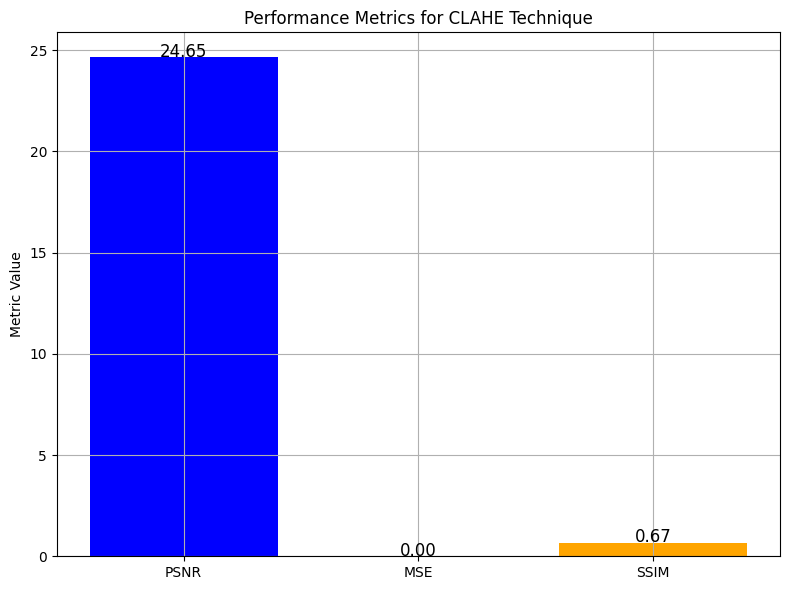

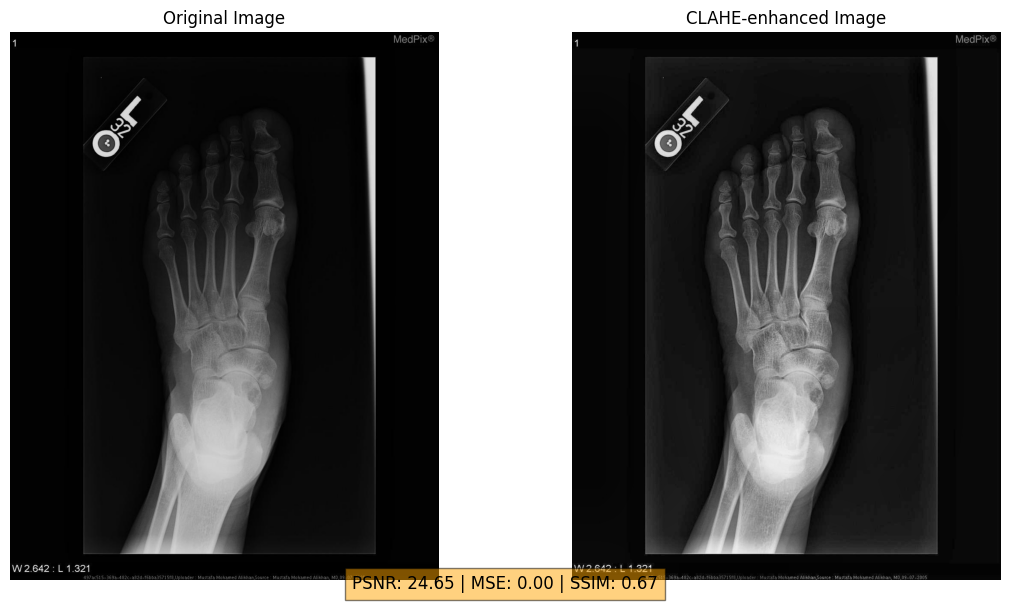

In [ ]:
from skimage import io, img_as_float
from skimage.metrics import peak_signal_noise_ratio as psnr, mean_squared_error as mse, structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np

# Load the original and CLAHE-enhanced X-ray images
original_image_path = '/content/drive/Shareddrives/Image Processing Assignment/images/053.jpg'
clahe_image_path = '/content/drive/Shareddrives/Image Processing Assignment/CLAHEImages/053.jpg'

# Load images
original_image = img_as_float(io.imread(original_image_path, as_gray=True))
clahe_image = img_as_float(io.imread(clahe_image_path, as_gray=True))

# Calculate performance metrics
psnr_value = psnr(original_image, clahe_image)
mse_value = mse(original_image, clahe_image)
ssim_value, _ = ssim(original_image, clahe_image, data_range=clahe_image.max() - clahe_image.min(), full=True)

# Create bar plot for the metrics
metrics = ['PSNR', 'MSE', 'SSIM']
values = [psnr_value, mse_value, ssim_value]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Performance Metrics for CLAHE Technique')
plt.ylabel('Metric Value')
plt.grid(True)

# Annotating each bar with its value
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

# Plotting the original, CLAHE images and the performance metrics
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display Original Image
ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Display CLAHE-enhanced Image
ax[1].imshow(clahe_image, cmap='gray')
ax[1].set_title('CLAHE-enhanced Image')
ax[1].axis('off')

# Show performance metrics in the plot
plt.figtext(0.5, 0.01, f'PSNR: {psnr_value:.2f} | MSE: {mse_value:.2f} | SSIM: {ssim_value:.2f}',
            ha='center', fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()


MSE: 13780.137210445804
PSNR: 6.738268189535748 dB
SSIM: 0.2013397164661522


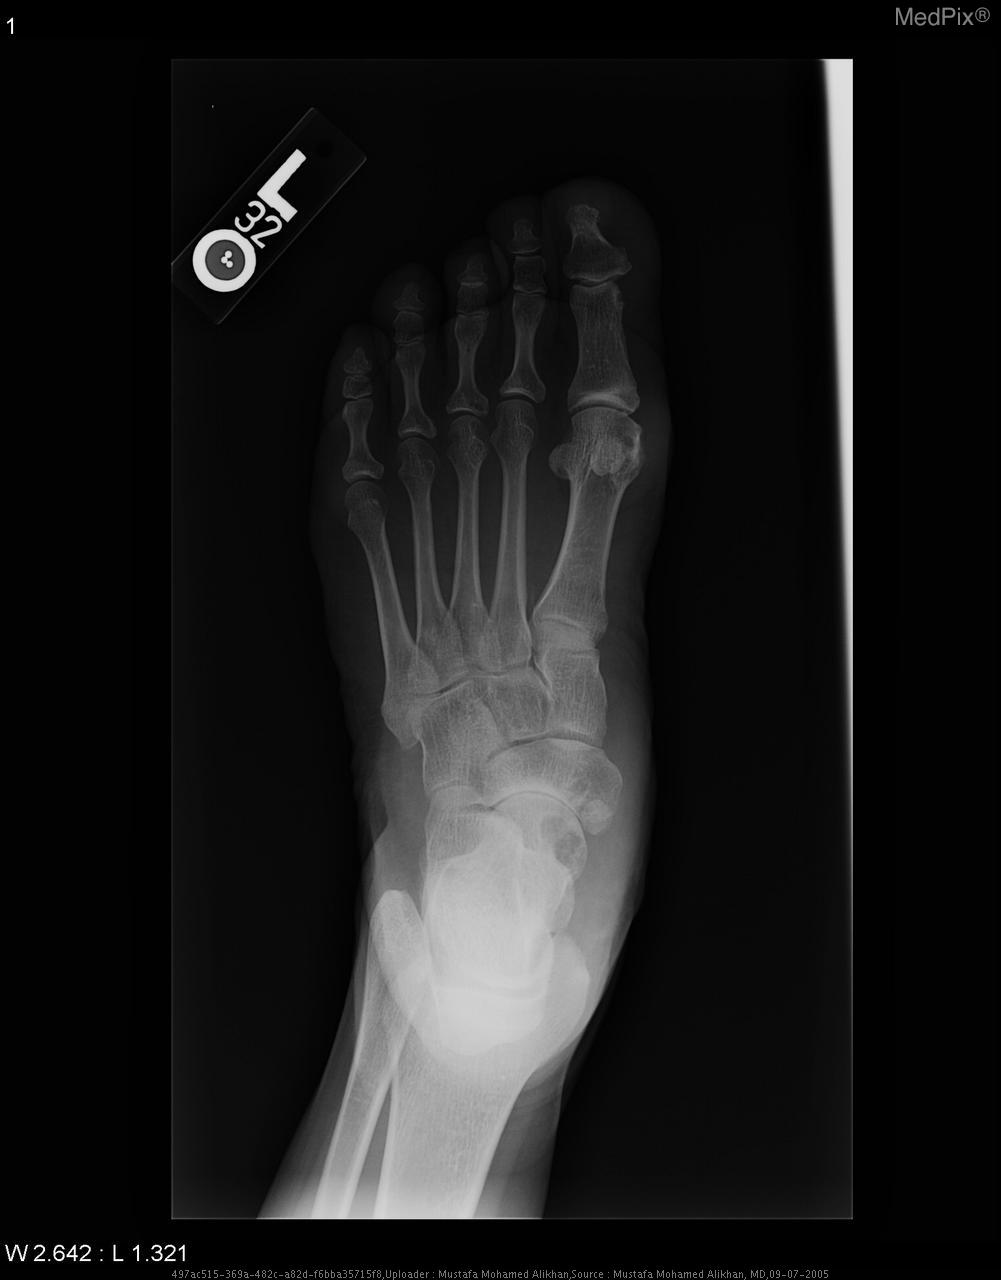

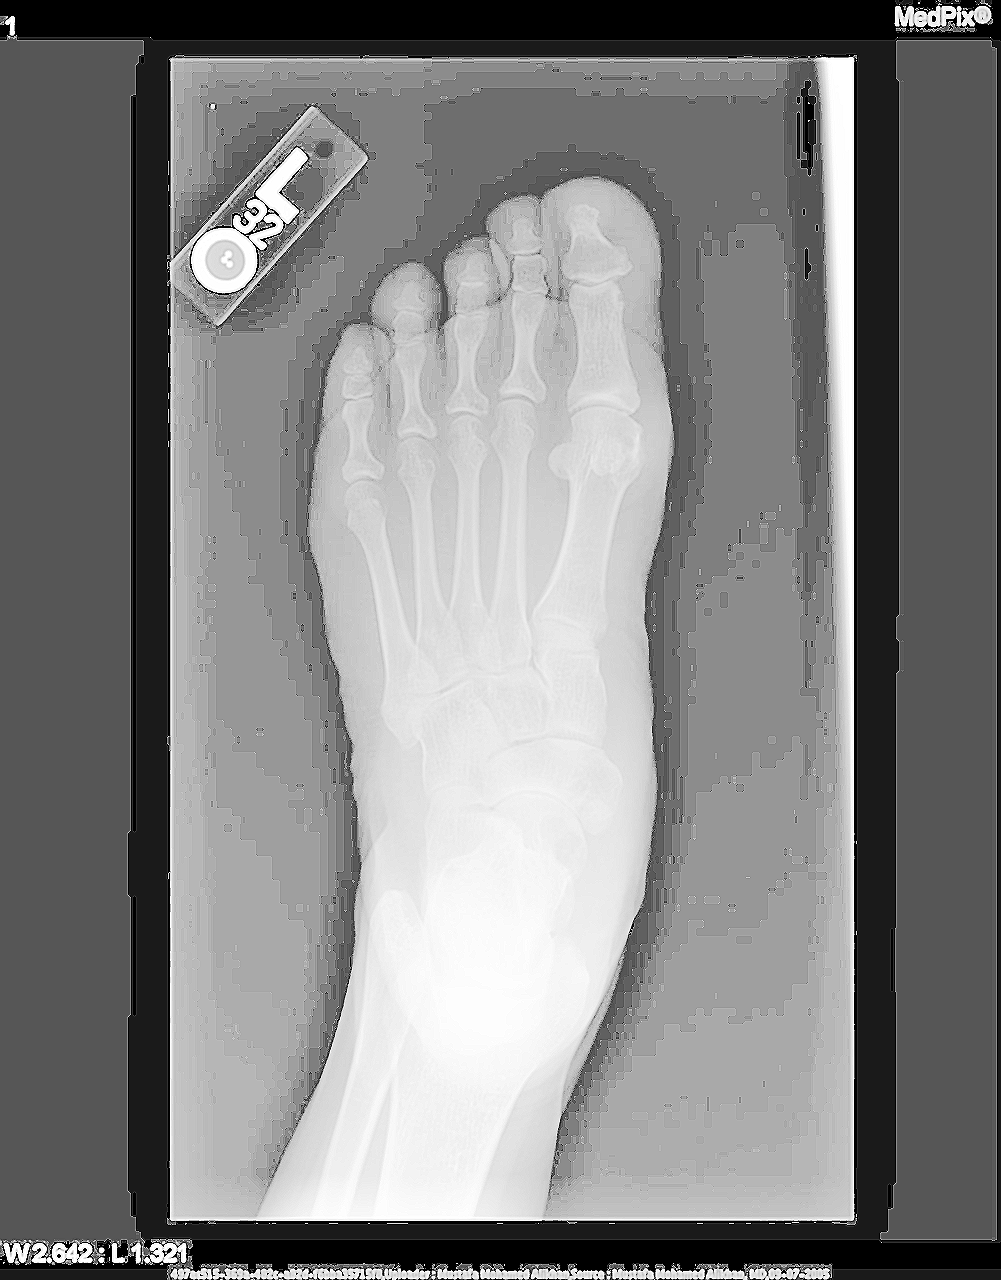

In [ ]:
import cv2
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
from google.colab.patches import cv2_imshow
from skimage import exposure

# Load the original image
image = cv2.imread('/content/drive/Shareddrives/Image Processing Assignment/images/053.jpg')

# Step 1: Smoothing (Noise Reduction)
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Unsharp Mask (Controlled Sharpening)
# Create a blurred version of the image
blurred_image = cv2.GaussianBlur(smoothed_image, (5, 5), 10)
# Subtract the blurred image from the original to enhance edges
unsharp_image = cv2.addWeighted(smoothed_image, 1.5, blurred_image, -0.5, 0)

# Step 3: Contrast Enhancement
# Apply histogram equalization to enhance global contrast
image_yuv = cv2.cvtColor(unsharp_image, cv2.COLOR_BGR2YUV)
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
contrast_enhanced_image = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

# Step 4: Final Sharpening (Mild)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
final_sharpened_image = cv2.filter2D(contrast_enhanced_image, -1, kernel)

# Save the final enhanced image
cv2.imwrite('enhanced_image.jpg', final_sharpened_image)

# Convert images to grayscale for computing MSE, PSNR, SSIM
original_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
final_gray = cv2.cvtColor(final_sharpened_image, cv2.COLOR_BGR2GRAY)

# Calculate Mean Squared Error (MSE)
mse_value = mean_squared_error(original_gray, final_gray)

# Calculate Peak Signal-to-Noise Ratio (PSNR)
psnr_value = peak_signal_noise_ratio(original_gray, final_gray)

# Calculate Structural Similarity Index (SSIM)
ssim_value, _ = structural_similarity(original_gray, final_gray, full=True)

# Print the results
print(f"MSE: {mse_value}")
print(f"PSNR: {psnr_value} dB")
print(f"SSIM: {ssim_value}")

# Display the original and enhanced images using cv2_imshow
cv2_imshow(image)
cv2_imshow(final_sharpened_image)


MSE: 222.97947443181818
PSNR: 24.648154733859656 dB
SSIM: 0.6900871056367532


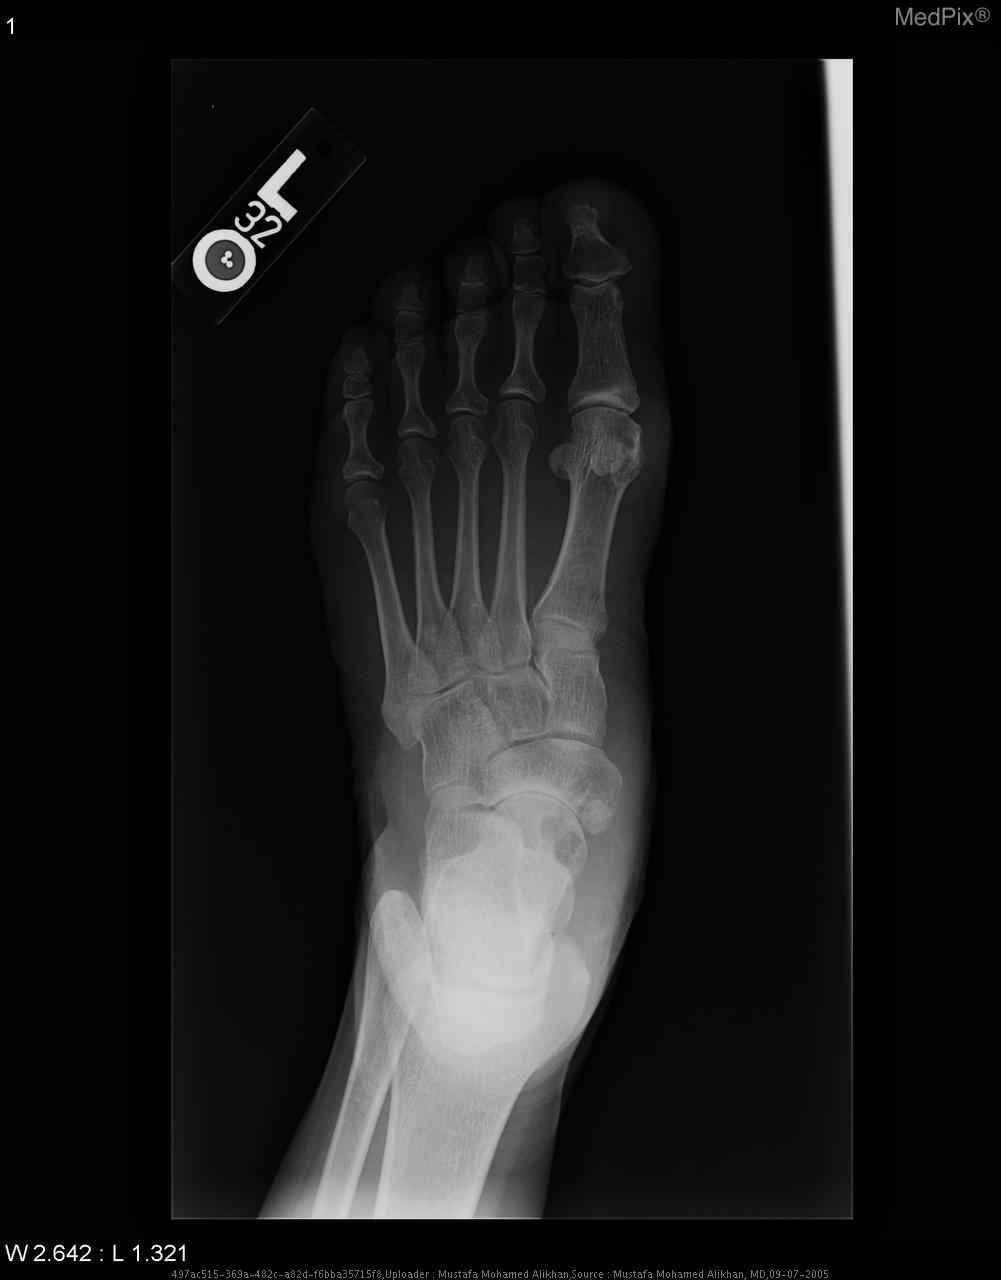

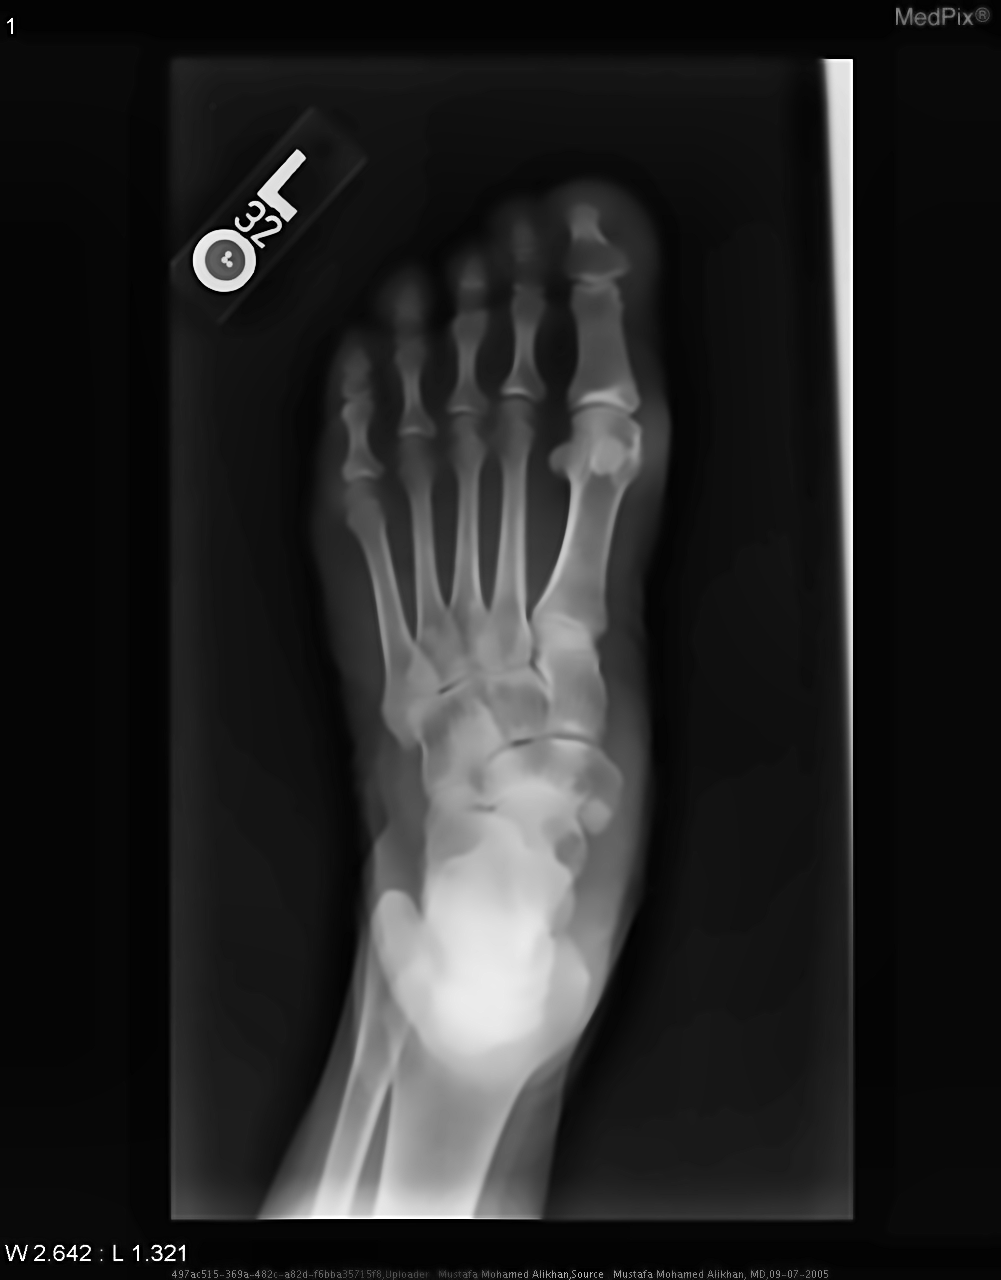

In [ ]:
import cv2
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
from google.colab.patches import cv2_imshow

# Load the original image (assuming grayscale X-ray image)
image = cv2.imread('/content/drive/Shareddrives/Image Processing Assignment/images/053.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Denoising using Non-Local Means (edge-preserving)
denoised_image = cv2.fastNlMeansDenoising(image, None, h=10, templateWindowSize=7, searchWindowSize=21)

# Step 2: Contrast enhancement using CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrast_enhanced_image = clahe.apply(denoised_image)

# Step 3: Sharpening using Bilateral filter (edge-preserving) + Unsharp Mask
bilateral_filtered_image = cv2.bilateralFilter(contrast_enhanced_image, d=9, sigmaColor=75, sigmaSpace=75)

# Creating an unsharp mask
blurred_image = cv2.GaussianBlur(bilateral_filtered_image, (9, 9), 10.0)
sharpened_image = cv2.addWeighted(bilateral_filtered_image, 1.5, blurred_image, -0.5, 0)

# Save the final enhanced image
cv2.imwrite('enhanced_xray_image.jpg', sharpened_image)

original_gray = image.astype(np.float32)
final_gray = sharpened_image.astype(np.float32)

# Calculate Mean Squared Error (MSE)
mse_value = mean_squared_error(original_gray, final_gray)

# Calculate Peak Signal-to-Noise Ratio (PSNR)
psnr_value = peak_signal_noise_ratio(original_gray, final_gray, data_range=final_gray.max() - final_gray.min())

# Calculate Structural Similarity Index (SSIM)
ssim_value, _ = structural_similarity(original_gray, final_gray, full=True, data_range=255)

# Print the results
print(f"MSE: {mse_value}")
print(f"PSNR: {psnr_value} dB")
print(f"SSIM: {ssim_value}")

# Display the original and enhanced images
cv2_imshow(image)
cv2_imshow(sharpened_image)


Results for the image:

Gaussian noise detected with std deviation: 49.63
Salt-and-pepper noise detected: 5.85% noise
Image is sharp (no significant blur detected)
Image contrast is fine


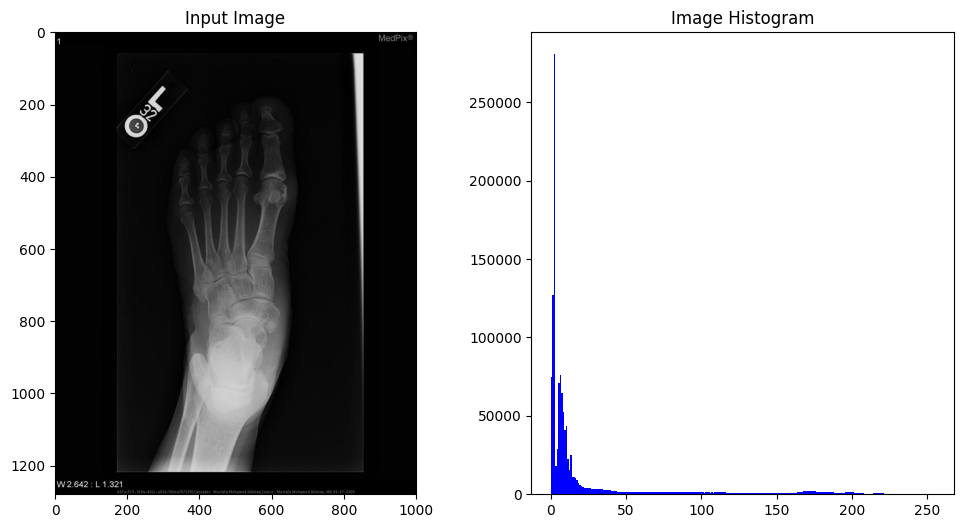

In [ ]:
import cv2
import numpy as np
from skimage import exposure
from scipy.ndimage import laplace, sobel
import matplotlib.pyplot as plt

def detect_gaussian_noise(image):
    """Detect Gaussian noise by calculating standard deviation of pixel intensity differences."""
    mean = np.mean(image)
    std_dev = np.std(image)
    if std_dev > 10:  # This threshold can be adjusted
        return f"Gaussian noise detected with std deviation: {std_dev:.2f}"
    else:
        return "No significant Gaussian noise detected"

def detect_salt_and_pepper_noise(image):
    """Detect salt and pepper noise by counting the number of black and white outliers."""
    black_pixels = np.sum(image == 0)
    white_pixels = np.sum(image == 255)
    total_pixels = image.size
    noise_percentage = (black_pixels + white_pixels) / total_pixels * 100
    if noise_percentage > 1:  # If more than 1% pixels are noise
        return f"Salt-and-pepper noise detected: {noise_percentage:.2f}% noise"
    else:
        return "No significant salt-and-pepper noise detected"

def detect_blur(image):
    """Detect blur by applying edge detection (Laplacian) and analyzing sharpness."""
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    if variance < 100:  # This threshold can be adjusted
        return f"Image is blurred (Laplacian variance: {variance:.2f})"
    else:
        return "Image is sharp (no significant blur detected)"

def detect_low_contrast(image):
    """Detect low contrast by analyzing the image histogram."""
    p2, p98 = np.percentile(image, (2, 98))
    if p98 - p2 < 50:  # If the pixel intensity range is small
        return "Low contrast detected"
    else:
        return "Image contrast is fine"

def analyze_image_problems(image_path):
    # Load the image (grayscale)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error loading image. Please check the file path.")
        return

    # Detect various problems
    gaussian_noise = detect_gaussian_noise(image)
    salt_pepper_noise = detect_salt_and_pepper_noise(image)
    blur = detect_blur(image)
    contrast = detect_low_contrast(image)

    # Print the results
    print(f"Results for the image:\n")
    print(gaussian_noise)
    print(salt_pepper_noise)
    print(blur)
    print(contrast)

    # Optionally: Display the image and its histogram
    plt.figure(figsize=(12, 6))

    # Show the image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Input Image')

    # Show the histogram
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, range=(0, 255), color='blue')
    plt.title('Image Histogram')
    plt.show()

# Provide the path to your X-ray or input image
image_path = '/content/drive/Shareddrives/Image Processing Assignment/images/053.jpg'  # Replace with your image path
analyze_image_problems(image_path)


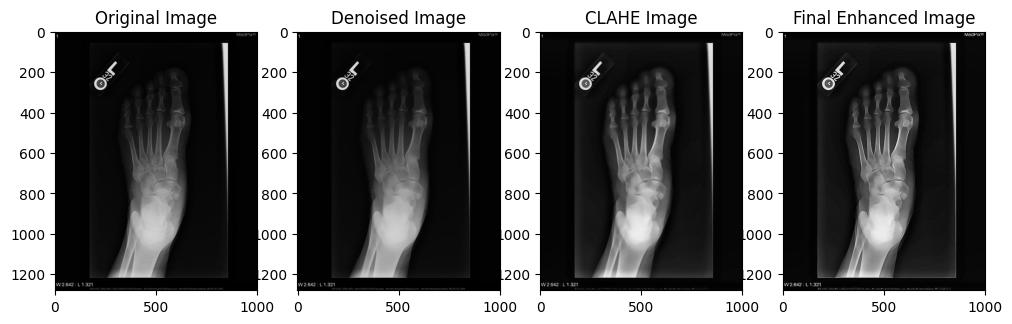

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_image(image_path):
    # Load the image (grayscale)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Step 1: Apply Non-Local Means Denoising
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=10, templateWindowSize=7, searchWindowSize=21)

    # Step 2: Apply Median Filtering to reduce salt-and-pepper noise
    median_filtered_image = cv2.medianBlur(denoised_image, 3)  # Adjust kernel size as needed

    # Step 3: Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(median_filtered_image)

    # Step 4: Sharpen the image (optional)
    sharpening_kernel = np.array([[-1, -1, -1],
                                  [-1, 9, -1],
                                  [-1, -1, -1]])
    sharpened_image = cv2.filter2D(clahe_image, -1, sharpening_kernel)

    # Display the results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 4, 2)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image')

    plt.subplot(1, 4, 3)
    plt.imshow(clahe_image, cmap='gray')
    plt.title('CLAHE Image')

    plt.subplot(1, 4, 4)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('Final Enhanced Image')

    plt.show()

    # Save the final enhanced image
    cv2.imwrite('enhanced_xray_image.jpg', sharpened_image)

# Provide the path to your X-ray or input image
image_path = '/content/drive/Shareddrives/Image Processing Assignment/images/053.jpg'  # Replace with your image path
enhance_image(image_path)


# Machine Learning Techniques